In [1]:
import numpy as np #to handle all the numbers and matrices
import pandas as pd #for reading and manipulating the data
import matplotlib.pyplot as plt #for data visualization
from numpy import array

In [2]:
data = pd.read_csv('/home/alaa/Desktop/Data_Analytics/Tweets.csv')

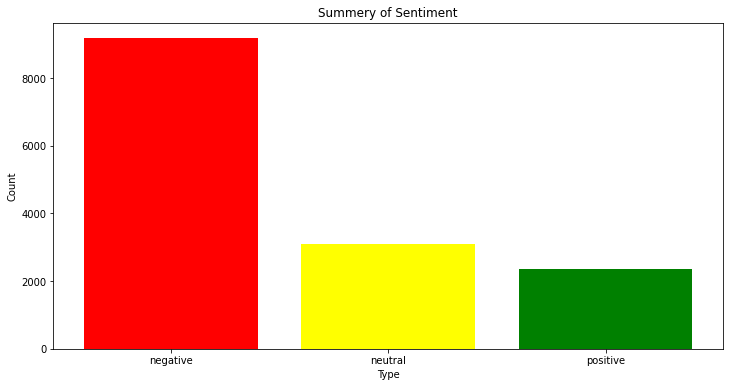

In [3]:
"""
Analysis and visualization on the data will be done and presented. Pandas and matplotlib are libraries for data visualization and statistics.the code will start by showing the number of negative, positive and neutral reviews.

"""

counter = data.airline_sentiment.value_counts()
index = [1,2,3]
plt.figure(1,figsize=(12,6))
plt.bar(index,counter,color=['red','yellow','green'])
plt.xticks(index,['negative','neutral','positive'],rotation=0)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Summery of Sentiment')
plt.show()

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
dtype: int64


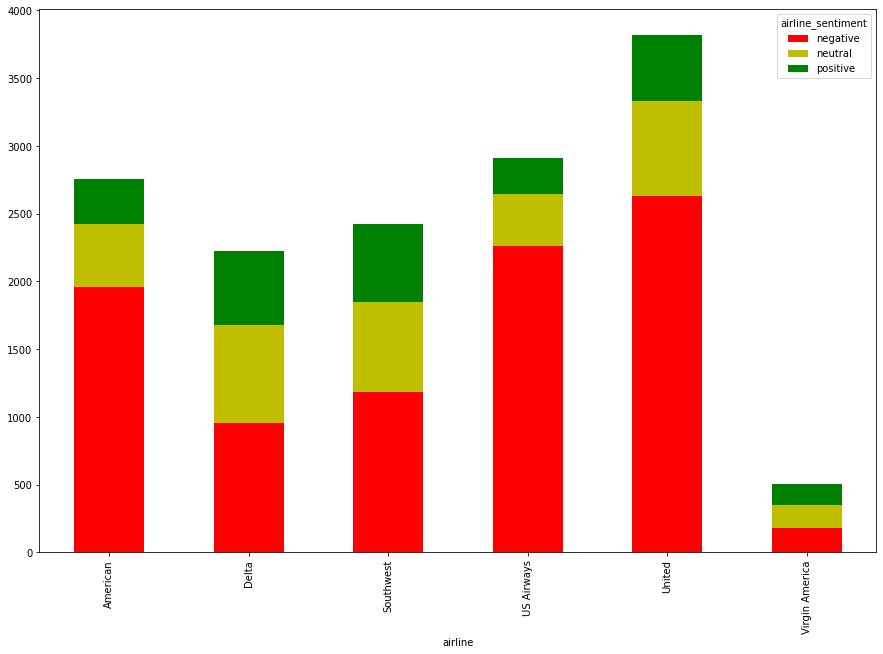

In [4]:
"""
the next part will show the numbers of each type of review for each airline.

"""

figure_2 = data.groupby(['airline', 'airline_sentiment']).size()
figure_2.unstack().plot(kind='bar', stacked=True,color=['r', 'y', 'g'], figsize=(15,10))
print(figure_2)
plt.show()

            Negative Percentage
American               0.710402
Delta                  0.429793
Southwest              0.490083
US Airways             0.776862
United                 0.688906
Virgin                 0.359127


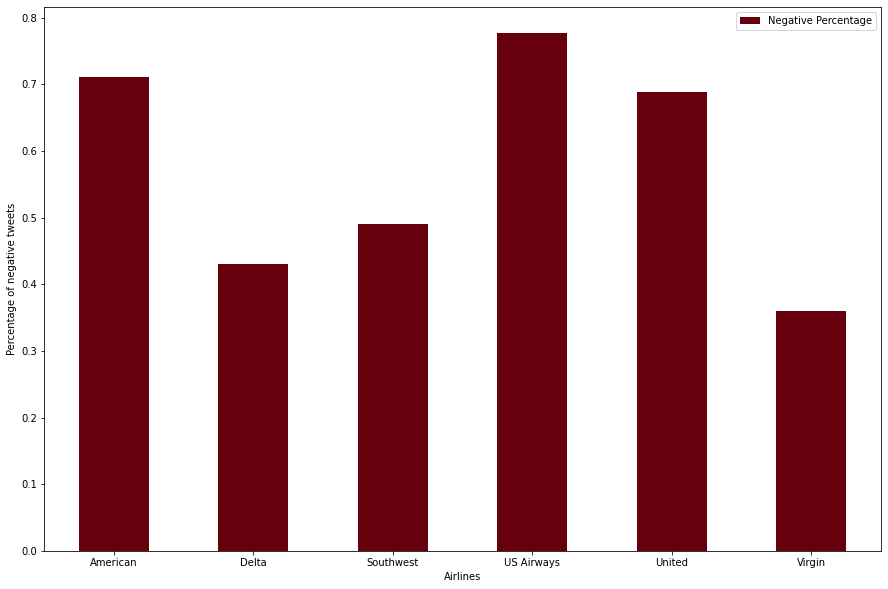

In [5]:
"""
 It is important to know which airline pleases their costumers the most. the code will show the percentage of the negative reviews for each airline.
"""

negative_tweets = data.groupby(['airline','airline_sentiment']).count().iloc[:,0]
total_tweets = data.groupby(['airline'])['airline_sentiment'].count()

Airline_negative_percentage = {'American':negative_tweets[0] / total_tweets[0],'Delta':negative_tweets[3] / total_tweets[1],'Southwest': negative_tweets[6] / total_tweets[2],
'US Airways': negative_tweets[9] / total_tweets[3],'United': negative_tweets[12] / total_tweets[4],'Virgin': negative_tweets[15] / total_tweets[5]}
percentage = pd.DataFrame.from_dict(Airline_negative_percentage, orient = 'index')
percentage.columns = ['Negative Percentage']
print(percentage)
ax = percentage.plot(kind = 'bar', rot=0, colormap = 'Reds_r', figsize=(15,10))
ax.set_xlabel('Airlines')
ax.set_ylabel('Percentage of negative tweets')
plt.show()

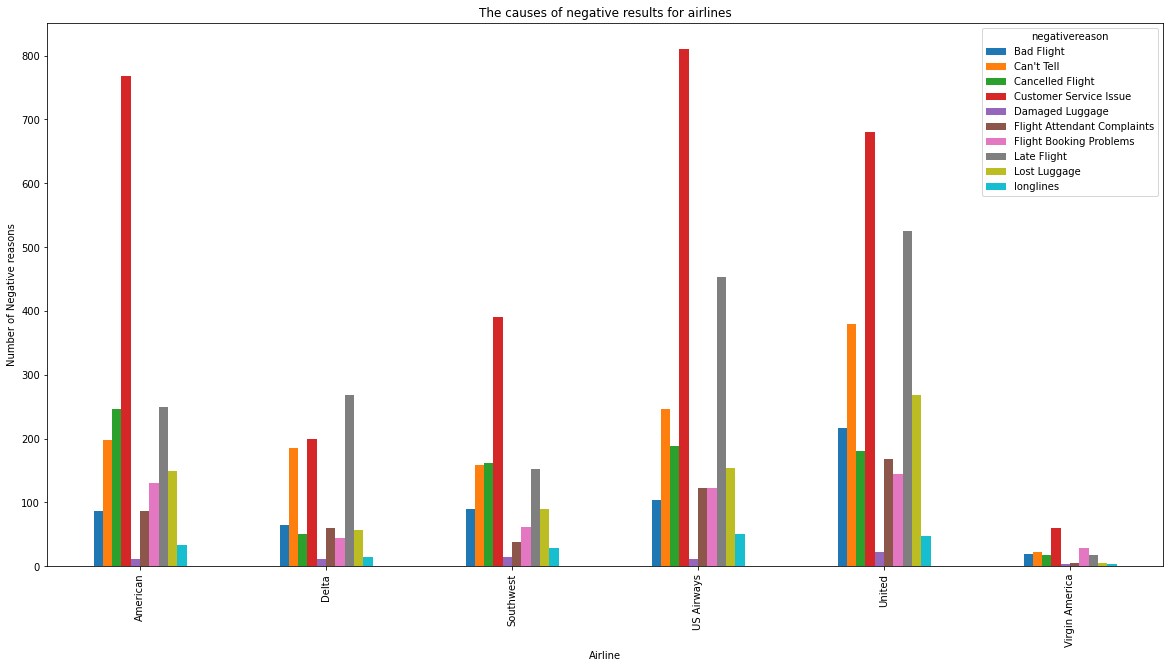

In [6]:
"""
people complain for many reasons. 10 reasons to be specific. In the next figure, the code will illustrate these reason for each airline.

"""

negative_reasons = data.groupby('airline')['negativereason'].value_counts(ascending=True)
negative_reasons.groupby(['airline','negativereason']).sum().unstack().plot(kind='bar', figsize=(20,10))
plt.xlabel('Airline')
plt.ylabel('Number of Negative reasons')
plt.title("The causes of negative results for airlines")
plt.show()

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

In [8]:
"""
Data cleaning and preprocessing:

This process is mandatory for training any machine learning and deep learning models, and without it the results differ significantly.

this process consist of removing mentions, removing links, removing the unnecessary stopwords, removing punctuations and convert the data to lower case. 

After the data is preprocessed, the sentiment and the tweet itself are needed. our data will be splitted to training (70%), validation (15%) and testing (15%).

"""

def remove_mentions(input_tweet):
    for i in range(len(input_tweet)):
        input_tweet[i] = re.sub(r'@\w+', '', input_tweet[i])
    return input_tweet

def remove_links(input_tweet):
    for i in range(len(input_tweet)):
        input_tweet[i] = re.sub(r'http\S+', '',input_tweet[i])
    return input_tweet

def remove_stopwords(input_tweet):
    list_of_stopwords = stopwords.words('english')
    #for sentiment analysis some stopwords might give an important indication ,for example: not no, so they should not be removed.
    important_stopwords = ["not", "no"]
    words = input_tweet.split() 
    clean_stopwords = [word for word in words if (word not in list_of_stopwords or word in important_stopwords) and len(word) > 1] 
    return " ".join(clean_stopwords)

def remove_punctuation(input_tweet):
    for i in range(len(input_tweet)):
        input_tweet[i] = re.sub(r'[^\w\s]','',input_tweet[i])
    return input_tweet

def lower_case(input_tweet):
    for i in range(len(input_tweet)):
        input_tweet[i] = input_tweet[i].lower()
    return input_tweet


data_new = data[['text', 'airline_sentiment']]
preprocessed_data = data_new.apply(remove_mentions).apply(remove_links).apply(remove_punctuation).apply(lower_case)
cleaned_tweets = []
for tweets in preprocessed_data.text:
    clean_stopwords = remove_stopwords(tweets)
    cleaned_tweets.append(clean_stopwords)

X = cleaned_tweets
Y = preprocessed_data['airline_sentiment']

Y = Y.map({'negative':0, 'positive':1, 'neutral':2}).astype(int)

In [9]:
comment_words = ''
for val in cleaned_tweets: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split()    
    comment_words += " ".join(tokens)+" "

In [10]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 1, collocations=False).generate(comment_words)

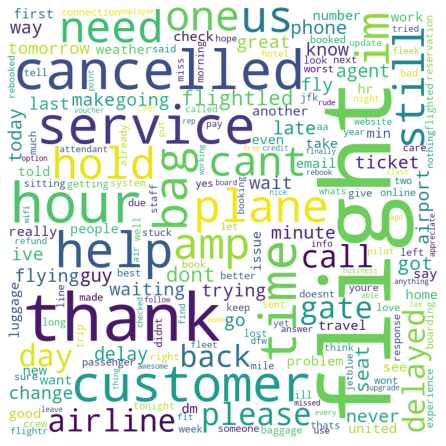

In [11]:
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [12]:
"""before the data is splitted, the sentiment will be mapped to numbers using one-hot-encoder, since the computers only understand numbers."""

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

values = array(X)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(onehot_encoded, Y, test_size=0.15, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.18, random_state=20)

In [14]:
"""Support Vector machines is a very popular technique for classification, it simply tries to find the line (vector) that best seperates the classes.The C (regularization) parameter is varied to get the best results.
both Linear Support Vector Classifier and  Radial Basis Function were apllied for classification,
and almost same validatioon accuracy was for both of them,
the linear SVC was chosen because it needed less resources (faster) 
then the algorithem was tested to choose the best c ( regularization parameter) and c=1 was chosen sence it produced the highest validation accuracy."""

from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, classification_report  #for confusion matrix and scores

def results(labels, pred):
    print(confusion_matrix(labels,pred))  
    print(classification_report(labels,pred))  
    


In [15]:
"""Support Vector machines is a very popular technique for classification, it simply tries to find the line (vector) that best seperates the classes.The C (regularization) parameter is varied to get the best results.
both Linear Support Vector Classifier and  Radial Basis Function were apllied for classification,
and almost same validatioon accuracy was for both of them,
the linear SVC was chosen because it needed less resources (faster) 
then the algorithem was tested to choose the best c ( regularization parameter) and c=1 was chosen sence it produced the highest validation accuracy."""

from sklearn.svm import LinearSVC, SVC

model = LinearSVC(C=1)
model.fit(X_train, y_train)

"""the model will be applied to the validation data """

print ("Validation Accuracy of SVM : %s" % ( accuracy_score(y_val, model.predict(X_val))))

Validation Accuracy of SVM : 0.6513392857142857


In [16]:
"""Now the SVM (linear SVC with c=1) model will be applied to the test data"""

print ("Test Accuracy of SVM : %s" % ( accuracy_score(y_test, model.predict(X_test))))
results(y_test, model.predict(X_test))

Test Accuracy of SVM : 0.6643897996357013
[[1394    0    0]
 [ 321   37    4]
 [ 407    5   28]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.79      1394
           1       0.88      0.10      0.18       362
           2       0.88      0.06      0.12       440

    accuracy                           0.66      2196
   macro avg       0.80      0.39      0.36      2196
weighted avg       0.74      0.66      0.56      2196

